In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import numpy as np
import re
import codecs
#% matplotlib inline
import gensim
import multiprocessing
from gensim.models import Word2Vec

# Exercise 2: Dùng thư viện sklearn, chạy lại với các dataset dưới, nhận xét khi thay đổi perplexity, https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

circles, perplexity=5 in 0.079 sec
circles, perplexity=30 in 0.15 sec
circles, perplexity=50 in 0.13 sec
circles, perplexity=100 in 0.14 sec
S-curve, perplexity=5 in 0.089 sec
S-curve, perplexity=30 in 0.11 sec
S-curve, perplexity=50 in 0.15 sec
S-curve, perplexity=100 in 0.12 sec
uniform grid, perplexity=5 in 0.1 sec
uniform grid, perplexity=30 in 0.14 sec
uniform grid, perplexity=50 in 0.17 sec
uniform grid, perplexity=100 in 0.16 sec


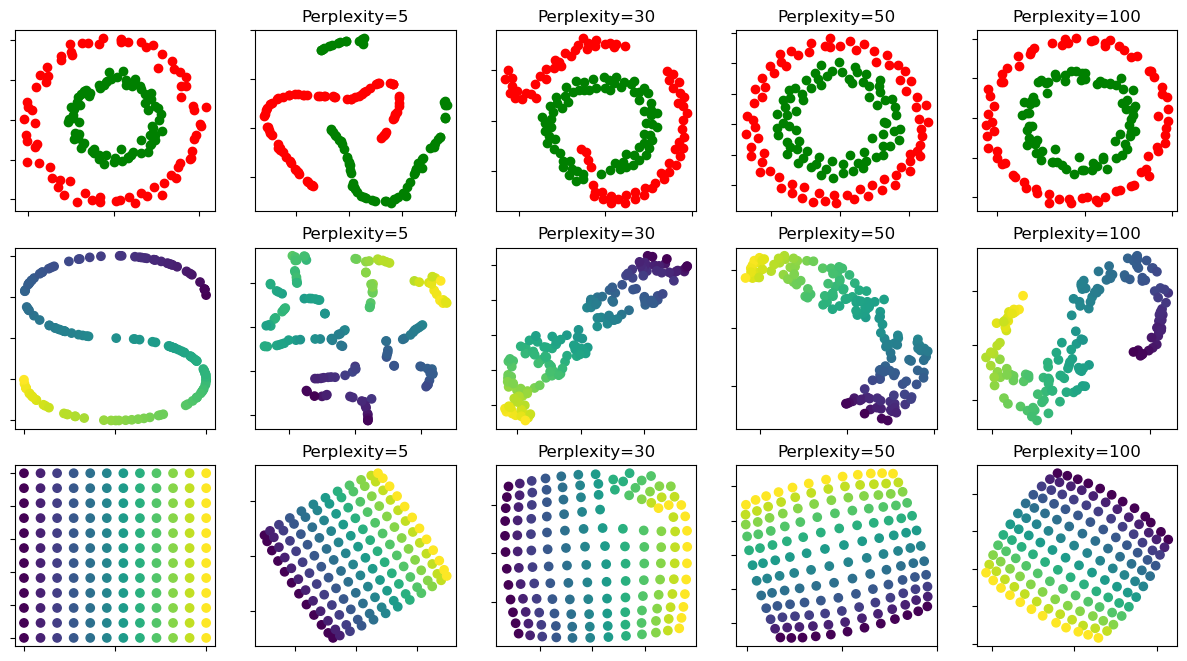

In [2]:
n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()


## 1. t-SNE for higher perplexities finds meaningful topology of two concentric circles, however the size and the distance of the circles varies slightly from the original. 

## 2. Contrary to the two circles dataset, the shapes visually diverge from S-curve topology on the S-curve dataset even for larger perplexity values.

## 3. As perplexity increase, the square dataset edges appear rounder and the sides seems clustered as the points's is very near to each other.

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [7]:

def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())


In [8]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [9]:
word_clusters

[['Parisian',
  'Hopital_Europeen_Georges_Pompidou',
  'Spyker_D##_Peking',
  'France',
  'Pantheon_Sorbonne',
  'Aeroports_De',
  'Grigny_south',
  'Place_Denfert_Rochereau',
  'guest_Olivier_Dolige',
  'Lazard_Freres_Banque',
  'Pitié_Salpêtrière_Hospital',
  'Le_Meridien_Etoile',
  'Nanterre_west',
  'Colombes',
  'Créteil',
  'Christian_Châtelet',
  'Melun',
  'Garches_west',
  'French',
  'Avignon',
  'Cergy_Pontoise',
  'Saint_Ouen',
  'Vandore_reported',
  'Ivry_sur_Seine',
  'Brussels',
  'Suresnes_west',
  'Elysées',
  'By_PETA_Protester',
  'Trappes',
  'Issy_les_Moulineaux'],
 ['Jython',
  'Perl_Python',
  'IronPython',
  'scripting_languages',
  'PHP_Perl',
  'Java_Python',
  'PHP',
  'Python_Ruby',
  'Visual_Basic',
  'Perl',
  'LISP',
  'scripting_language',
  'XSLT',
  'TurboGears',
  'PHP_Hypertext_Preprocessor',
  'VB6',
  'PHP_Ruby',
  'ExtJS',
  'glibc',
  'Qt',
  'Clojure',
  'Rubinius',
  'Perl_PHP_Python',
  'Gnome',
  'NET_CLR',
  'Smalltalk',
  'EJB3',
  'Perl_s

## Embbeded word closely related in:
### - term: Example:
+ 'releasing': 'releases',
  'released',
  'relase',
  'Releasing',
  'Release',
  'realease',
  'relased',
  'Released',
  'releas',
  'therelease'...
  
  
### - meaning: Example:
+ 'experiences':
  'experi_ence',
  'expertise',
  'expereince',
  'experince',
  'knowledge',
  'experiece',
  'experienced',
  'exprience',
  'ex_perience',
  'familiarity',
  'skills',
  'Experience'...
  
 
### - fields: Example:
+ 'iPhone_OS':
  'Apple_iOS',
  'iOS4',
  'iPhone',
  'iOS_devices',
  'iOS#.#',
  'Android',
  'Android_OS',
  'iOS_#.#.#',
  'BlackBerry_OS',
  'OS_X_Snow_Leopard' ...


### - events: Example:
+ 'wars':
  'War',
  'invasion',
  'Persian_Gulf_War',
  'Vietnam_War',
  'Iraq',
  'unwinnable_quagmire',
  'un_winnable',
  'occupation',
  'conflict',
  'un_winnable_war',
  'hostilities' ...

In [10]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

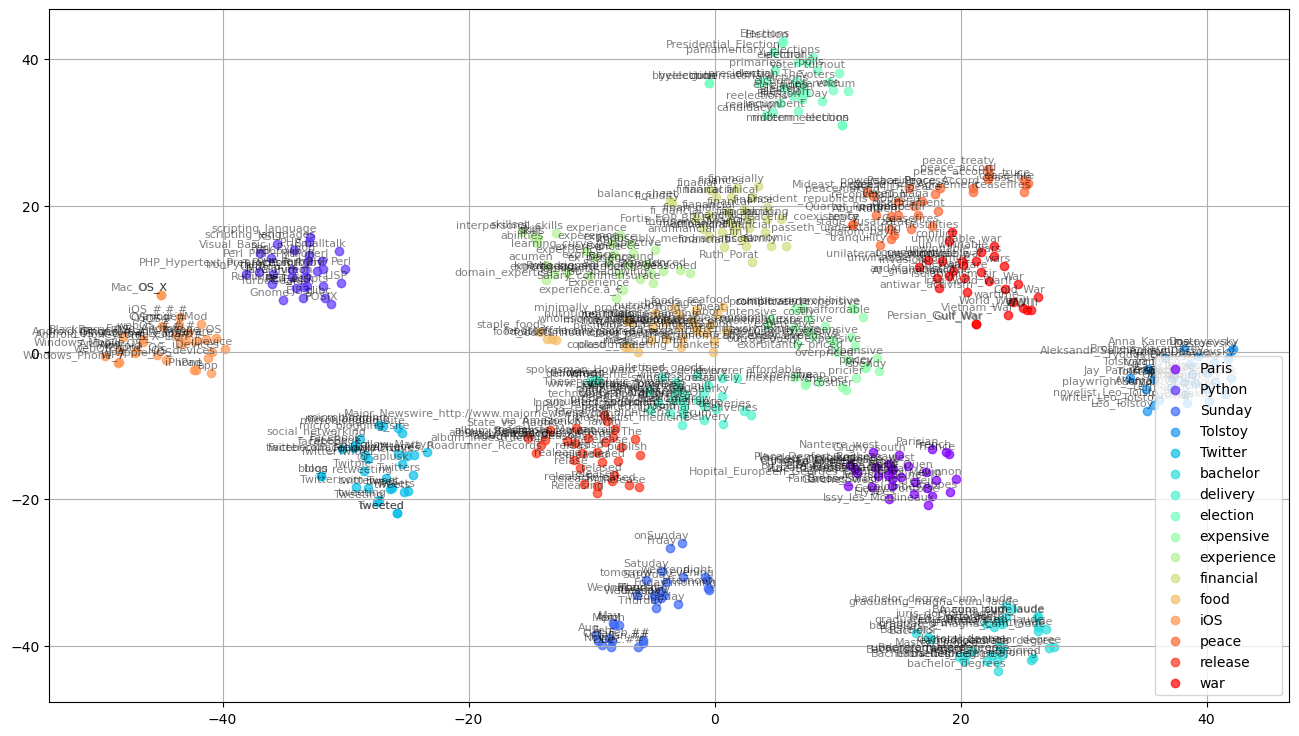

In [11]:

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

## - Các cụm phân loại khá tốt: bachelor, Sunday, election, Python, IOS. Còn lại hơi vó cục ở giữa.
## - Tất cả từ embeded tạo nên các cụm khá rõ ràng, khoảng cách khá gần nhau.